In [1]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import matplotlib.pyplot as plt
import numpy as np
import datetime

plt.rcParams["figure.figsize"] = (15,5)

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
USB.__version__

'0.2.4'

In [2]:
# init FTDI device
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6)
# reload configuration (optional step - just to fill BRAM (DACGAIN registers) with initial values)
fpga.reload()
# reset fpga
fpga.reset()

In [3]:
fpga.set_pulseform(initDelay=5, POn=16, PInter=16, Poff=5000)
gain = [int(100 + ((1000-100)*x*x*x/32/32/32)) for x in range(32)]

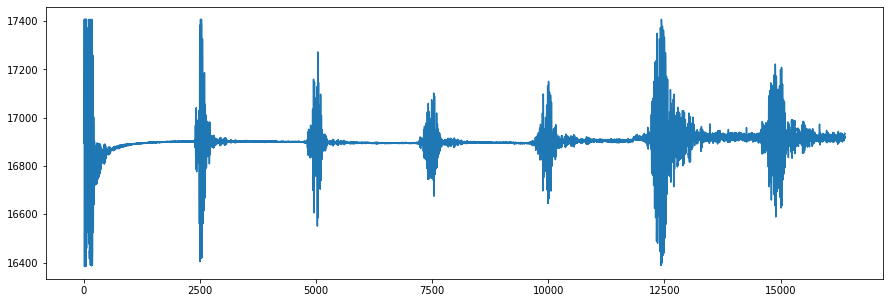

In [4]:
acq_res = fpga.do_acquisition(acq_lines=32, gain=gain, double_rate=True) 

plt.plot(acq_res[0])

In [6]:
fpga.save("Test")

'Test.npz'

In [3]:
plot = USB.FView()

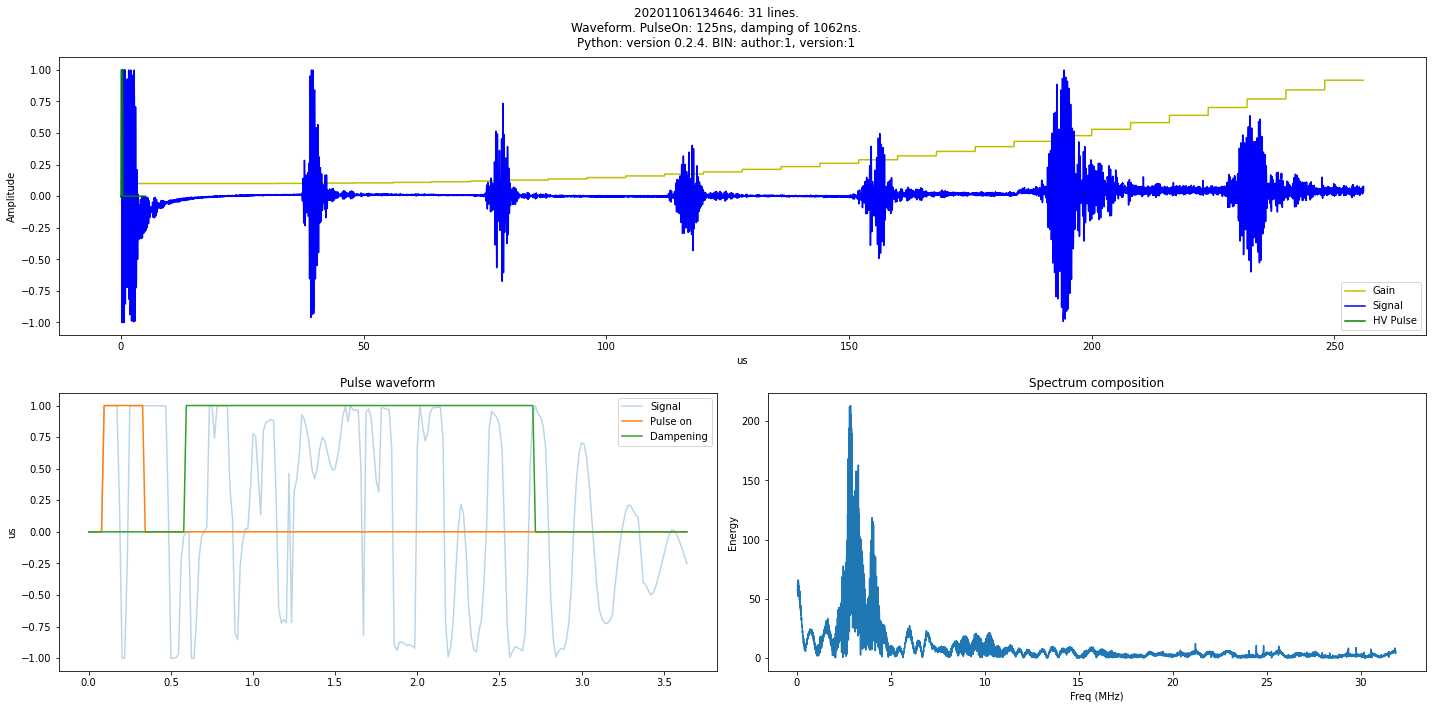

In [4]:
plot.readfile('Test.npz')

In [ ]:
plt.imshow("")